<a href="https://colab.research.google.com/github/jordanbell2357/DSP/blob/main/FIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finite Impulse Response (FIR) filters

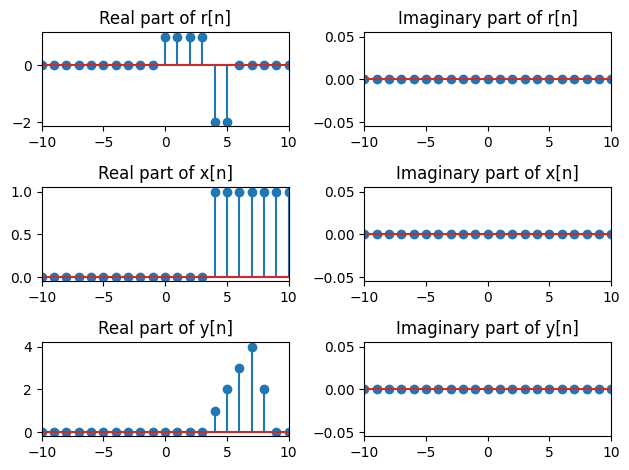

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the Heaviside step function
def u(n):
    return np.where(n >= 0, 1, 0)

# Define the impulse response function
def r(n):
    return (signal.unit_impulse(len(n), n==0) +
            signal.unit_impulse(len(n), n==1) +
            signal.unit_impulse(len(n), n==2) +
            signal.unit_impulse(len(n), n==3) -
            2 * signal.unit_impulse(len(n), n==4) -
            2 * signal.unit_impulse(len(n), n==5))

# Define the input function
def x(n):
    return u(n - 4)

# Create the time axis
n = np.arange(-10, 11)

# Calculate the impulse response and input signal
r_n = r(n)
x_n = x(n)

# Convolve the input signal with the impulse response to get the system response
y_n = signal.convolve(x_n, r_n, mode='same')

# Plot the real and imaginary parts of the impulse response function
plt.subplot(3, 2, 1)
plt.stem(n, r_n)
plt.title('Real part of r[n]')
plt.xlim([-10, 10])
plt.subplot(3, 2, 2)
plt.stem(n, np.imag(r_n))
plt.title('Imaginary part of r[n]')
plt.xlim([-10, 10])

# Plot the real and imaginary parts of the input function
plt.subplot(3, 2, 3)
plt.stem(n, x_n)
plt.title('Real part of x[n]')
plt.xlim([-10, 10])
plt.subplot(3, 2, 4)
plt.stem(n, np.imag(x_n))
plt.title('Imaginary part of x[n]')
plt.xlim([-10, 10])

# Plot the real and imaginary parts of the system response
plt.subplot(3, 2, 5)
plt.stem(n, y_n)
plt.title('Real part of y[n]')
plt.xlim([-10, 10])
plt.subplot(3, 2, 6)
plt.stem(n, np.imag(y_n))
plt.title('Imaginary part of y[n]')
plt.xlim([-10, 10])

plt.tight_layout()
plt.show()


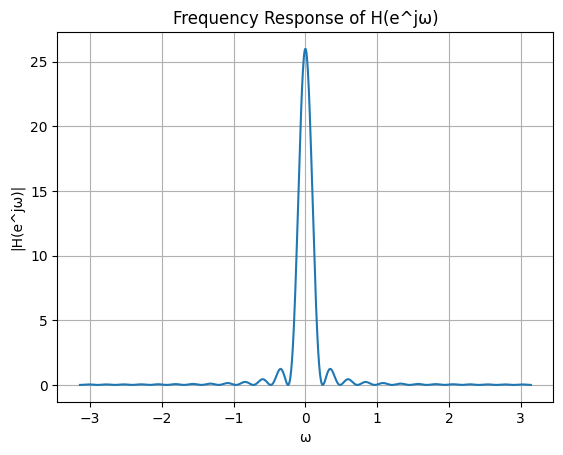

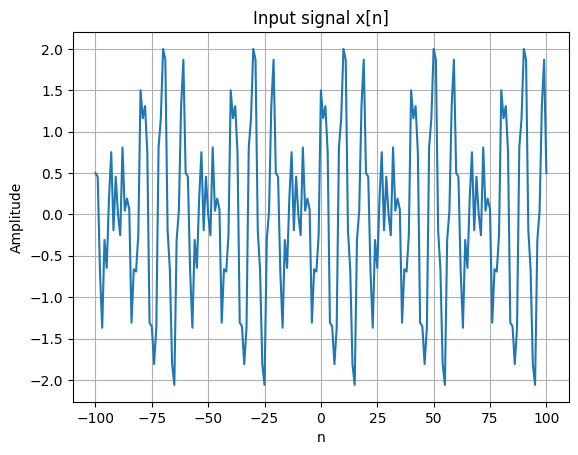

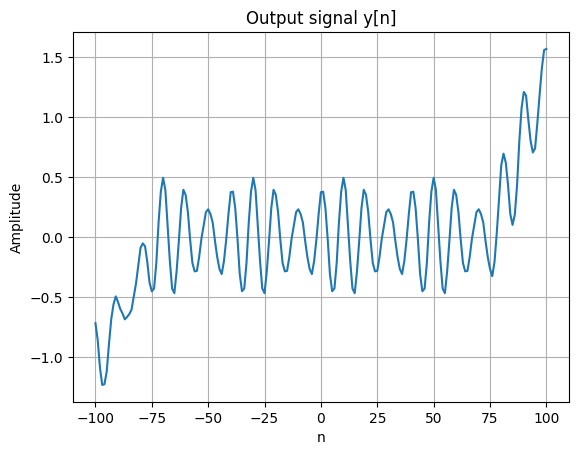

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the input signal
def x(n):
    return np.cos(np.pi * n / 5) + np.sin(np.pi * n / 4) + 0.5 * np.cos(3 * np.pi * n / 4)

# Time axis
n = np.arange(-100, 101)

# Frequency axis
omega = np.linspace(-np.pi, np.pi, 1000)

# Triangular window to approximate the desired frequency response
filter_length = 51  # You can adjust this length for better approximation
triangular_window = signal.windows.triang(filter_length)

# Use the triangular window as the impulse response
h_n = triangular_window

# Calculate the frequency response of the filter
_, H_omega = signal.freqz(h_n, worN=omega)

# Calculate the input and output signals
x_n = x(n)
y_n = signal.convolve(x_n, h_n, mode='same')

# Plot the frequency response
plt.figure()
plt.plot(omega, abs(H_omega))
plt.title('Frequency Response of H(e^jω)')
plt.xlabel('ω')
plt.ylabel('|H(e^jω)|')
plt.grid()

# Plot the input signal
plt.figure()
plt.plot(n, x_n)
plt.title('Input signal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()

# Plot the output signal
plt.figure()
plt.plot(n, y_n)
plt.title('Output signal y[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()

plt.show()


In [11]:
from sympy import symbols, pi, Piecewise, inverse_fourier_transform

omega = symbols('omega', real=True)

# Defining the piecewise function for the given frequency response
H_omega = Piecewise(
    (0, omega < -pi/2),
    (2 * (omega + pi/2) / pi, (omega >= -pi/2) & (omega < 0)),
    (2 * (-omega + pi/2) / pi, (omega >= 0) & (omega < pi/2)),
    (0, omega >= pi/2)
)

# Inverse Fourier Transform to get the impulse response
n = symbols('n', integer=True)
h_n_tuple = inverse_fourier_transform(H_omega, omega, n, noconds=False)

# Extract the expression from the tuple
h_n = h_n_tuple[0]

print(h_n.simplify())


Piecewise((((2 - exp(I*pi**2*n))*exp(I*pi**2*n) - 1)*exp(-I*pi**2*n)/(2*pi**3*n**2), (n > 0) | (n < 0)), (pi/2, True))


<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(n, 0),less(n, 0))),True], [(1/2)*((2 - exp(1j*pi**2*n))*exp(1j*pi**2*n) - 1)*exp(-1j*pi**2*n)/(pi**3*n**2),(1/2)*pi], default=nan)


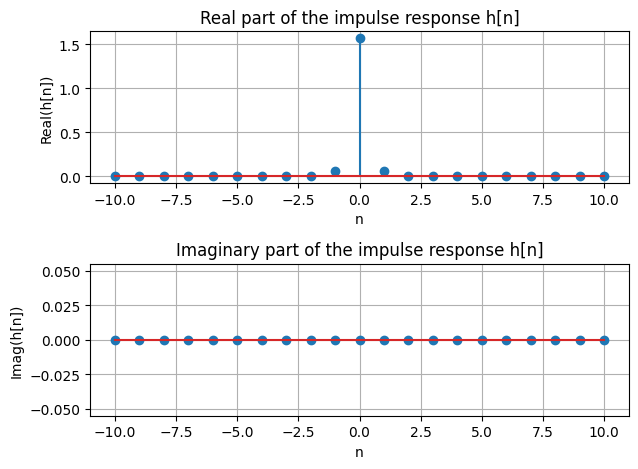

In [13]:
from sympy import symbols, pi, Piecewise, lambdify, inverse_fourier_transform
import matplotlib.pyplot as plt
import numpy as np

omega = symbols('omega', real=True)

# Defining the piecewise function for the given frequency response
H_omega = Piecewise(
    (0, omega < -pi/2),
    (2 * (omega + pi/2) / pi, (omega >= -pi/2) & (omega < 0)),
    (2 * (-omega + pi/2) / pi, (omega >= 0) & (omega < pi/2)),
    (0, omega >= pi/2)
)

# Inverse Fourier Transform to get the impulse response
n = symbols('n', integer=True)
h_n_tuple = inverse_fourier_transform(H_omega, omega, n, noconds=False)

# Extract the expression from the tuple
h_n = h_n_tuple[0]

# Create a function to evaluate the expression
h_n_func = lambdify(n, h_n, 'numpy')

# Evaluate and plot the real part of the impulse response
n_values = np.arange(-10, 11)
h_n_values = h_n_func(n_values)

plt.subplot(2, 1, 1)
plt.stem(n_values, h_n_values, markerfmt='o')
plt.title('Real part of the impulse response h[n]')
plt.xlabel('n')
plt.ylabel('Real(h[n])')
plt.grid(True)

# Plot the imaginary part of the impulse response (it will be all zeros)
plt.subplot(2, 1, 2)
plt.stem(n_values, np.zeros_like(n_values), markerfmt='o')
plt.title('Imaginary part of the impulse response h[n]')
plt.xlabel('n')
plt.ylabel('Imag(h[n])')
plt.grid(True)

plt.tight_layout()
plt.show()


In [15]:
from sympy import cos, sin, fourier_transform, simplify

# Defining the input signal
x_n = cos(pi * n / 5) + sin(pi * n / 4) + 0.5 * cos(3 * pi * n / 4)

# Calculating the Fourier Transform of the input signal
X_omega = fourier_transform(x_n, n, omega)

# Calculating the Fourier Transform of the output signal
Y_omega = H_omega * X_omega

# Calculating the time domain expression for the output signal
y_n = inverse_fourier_transform(Y_omega, omega, n, noconds=False)

# Simplifying the expression
y_n_simplified = simplify(y_n[0])

print(y_n_simplified)


0
